# Competencia Kaggle: Titanic

## EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_train = pd.read_csv('titanic_data/train.csv')
df_test= pd.read_csv('titanic_data/test.csv')

### Chequeo mi dataset de entrenamiento

In [5]:
print(df_train.shape)
df_train.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Acá ya puedo notar algunas cosas de mi set de datos. Por un lado, veo que en Age hay un mínimo que vendría a ser un outlier. También en Cabin tengo muchos valores NaN como puedo ver en el head.

In [7]:
for c in df_train.columns:
    print(c, df_train[c].isna().sum(), df_train[c].notna().sum())

PassengerId 0 891
Survived 0 891
Pclass 0 891
Name 0 891
Sex 0 891
Age 177 714
SibSp 0 891
Parch 0 891
Ticket 0 891
Fare 0 891
Cabin 687 204
Embarked 2 889


Tengo bastantes NaN en Ag y Cabin.

### Chequeo el de test.

In [8]:
print(df_test.shape)
df_test.head()


(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
for c in df_test.columns:
    print(c, df_test[c].isna().sum(), df_test[c].notna().sum())

PassengerId 0 418
Pclass 0 418
Name 0 418
Sex 0 418
Age 86 332
SibSp 0 418
Parch 0 418
Ticket 0 418
Fare 1 417
Cabin 327 91
Embarked 0 418


Misma tendencia que en train..

### Algunas visualizaciones para ayudar a la limpieza.

In [10]:
import warnings

warnings.filterwarnings("ignore")

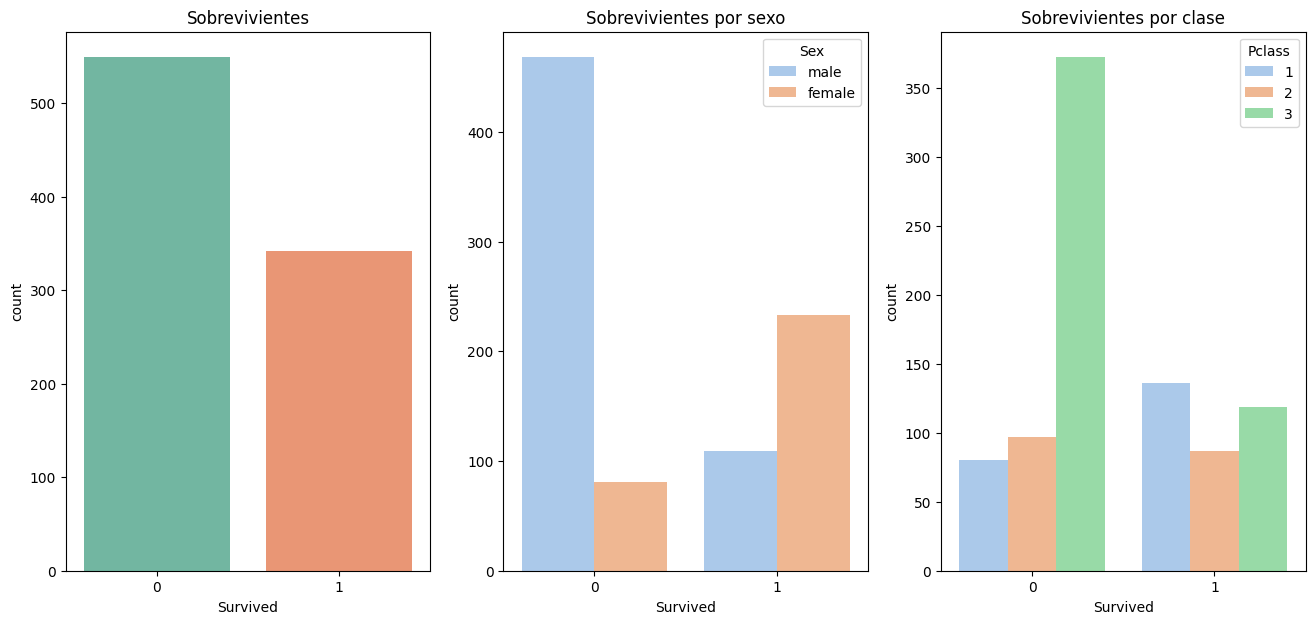

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 7))
sns.countplot(x='Survived', data=df_train, palette='Set2', ax=ax1)
ax1.set_title('Sobrevivientes')
sns.countplot(x='Survived', hue='Sex', data=df_train, palette='pastel', ax=ax2)
ax2.set_title('Sobrevivientes por sexo')
sns.countplot(x='Survived', hue='Pclass', data=df_train, palette='pastel', ax=ax3)
ax3.set_title('Sobrevivientes por clase')
plt.show()

Vemos que la mayor parte de los sobrevivientes pertenecen al género femenino, y de los no sobrevivientes vemos que la gran mayoría son de la clase 3.

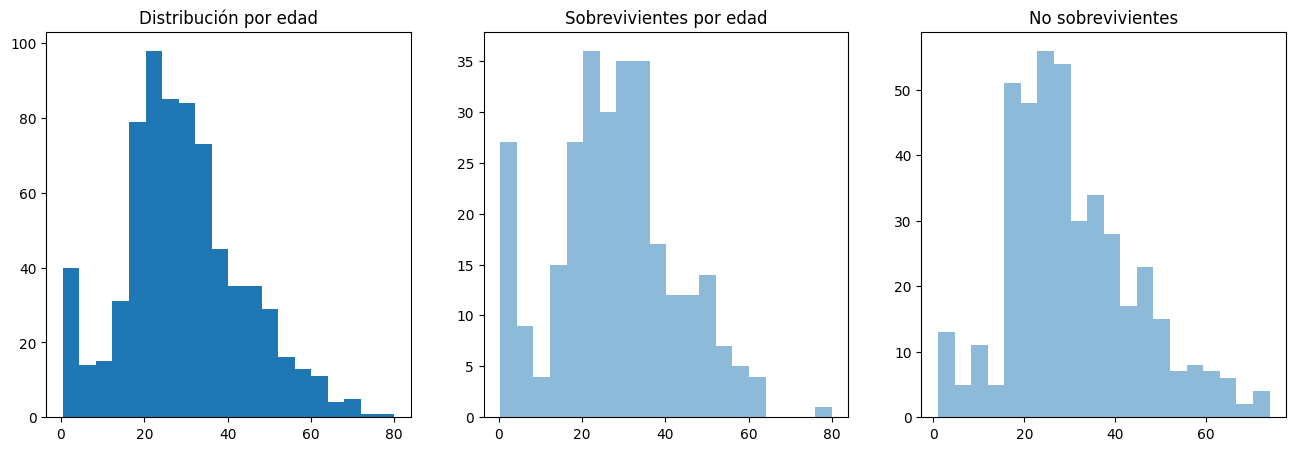

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 5))
ax1.hist(df_train['Age'], bins=20)
ax1.set_title('Distribución por edad')
ax2.hist(df_train['Age'][df_train['Survived'] == 1], bins=20, alpha=0.5, label='Sobrevivientes')
ax2.set_title('Sobrevivientes por edad')
ax3.hist(df_train['Age'][df_train['Survived'] == 0], bins=20, alpha=0.5, label='No sobrevivientes')
ax3.set_title('No sobrevivientes')
plt.show()

En cuanto a la edad podemos ver que la mayor parte de los niños fueron están dentro del grupo de sobrevivientes.

<Axes: >

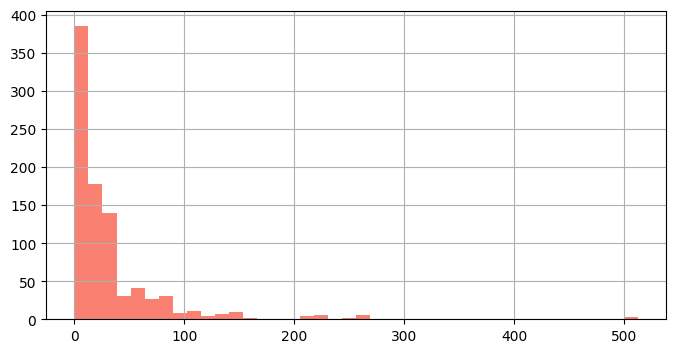

In [13]:
df_train['Fare'].hist(color='salmon',bins=40,figsize=(8,4))

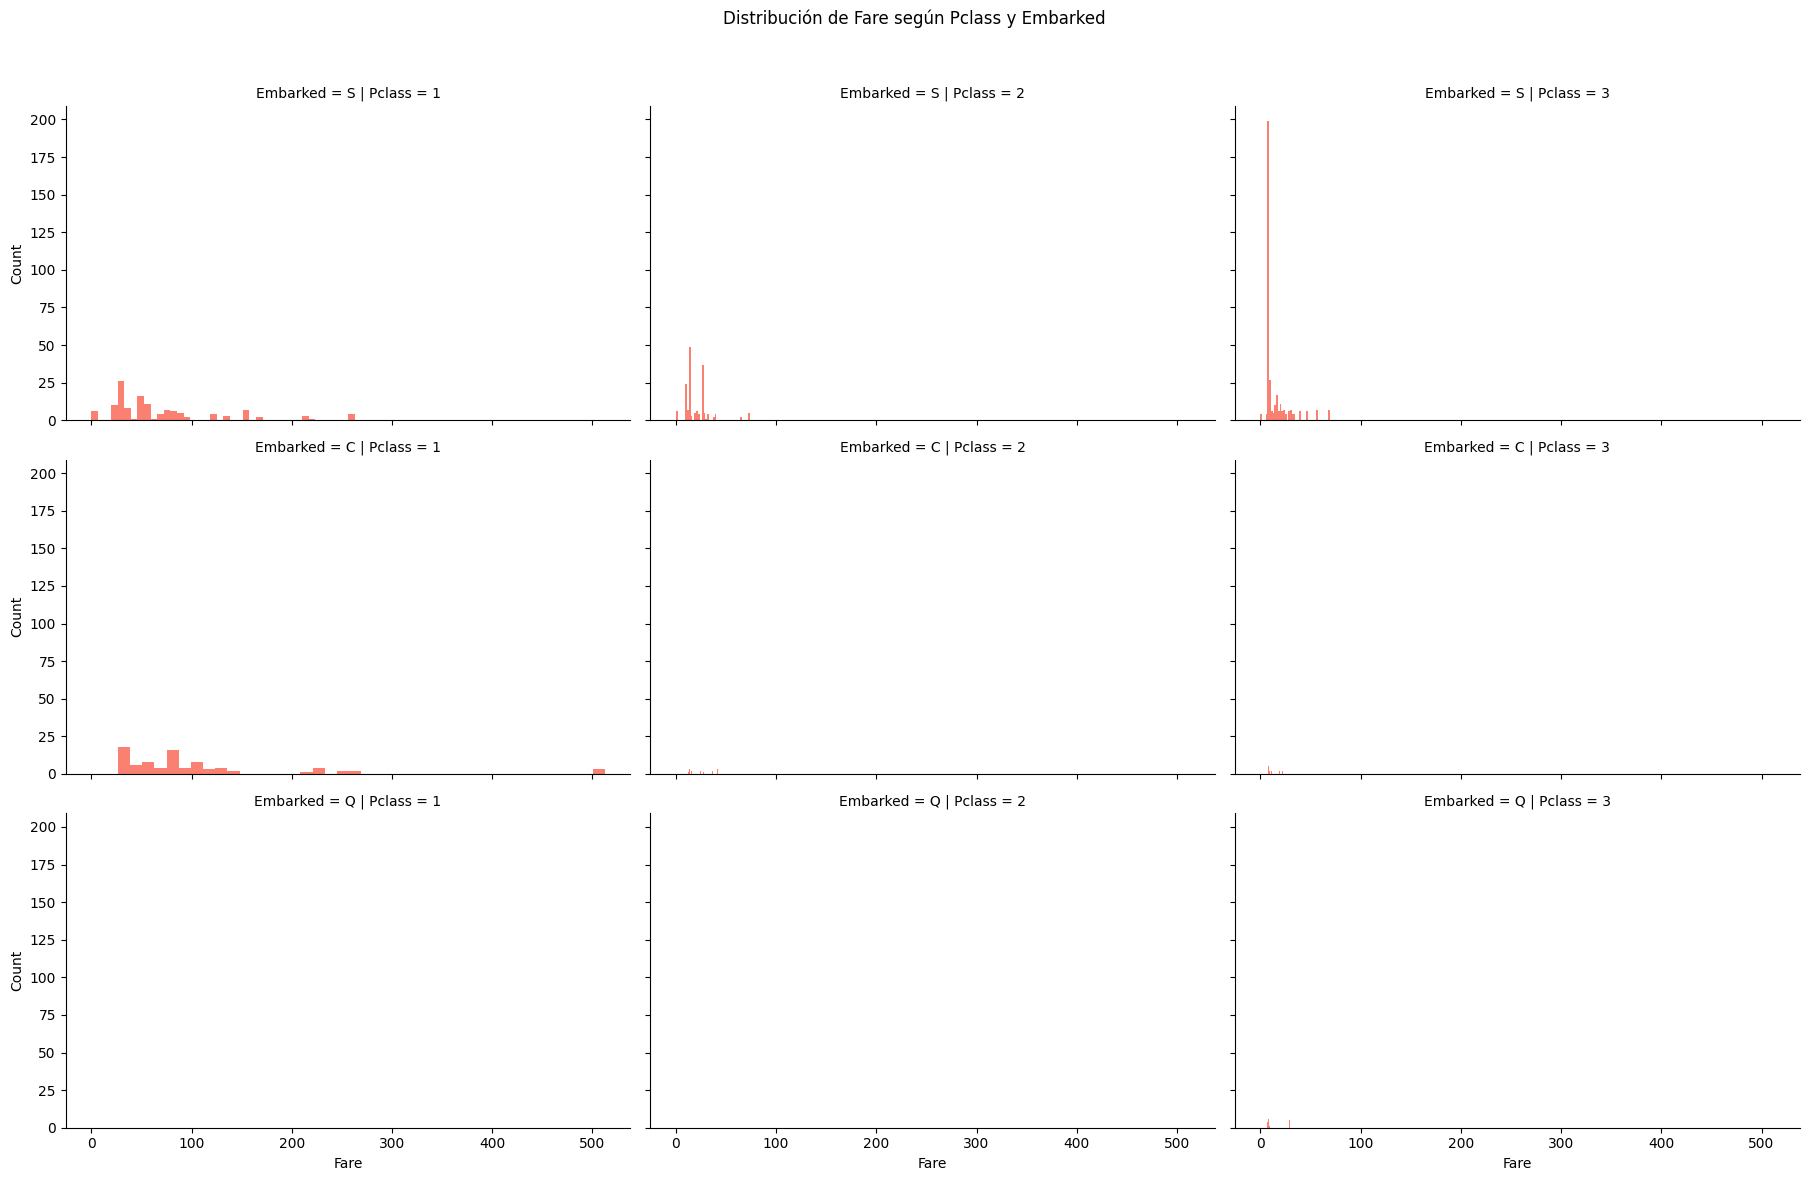

In [16]:
g = sns.FacetGrid(df_train, col='Pclass', row='Embarked', height=4, aspect=1.5)
g.map(plt.hist, 'Fare', bins=40, color='salmon')
g.set_axis_labels('Fare', 'Count')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de Fare según Pclass y Embarked')
plt.show()


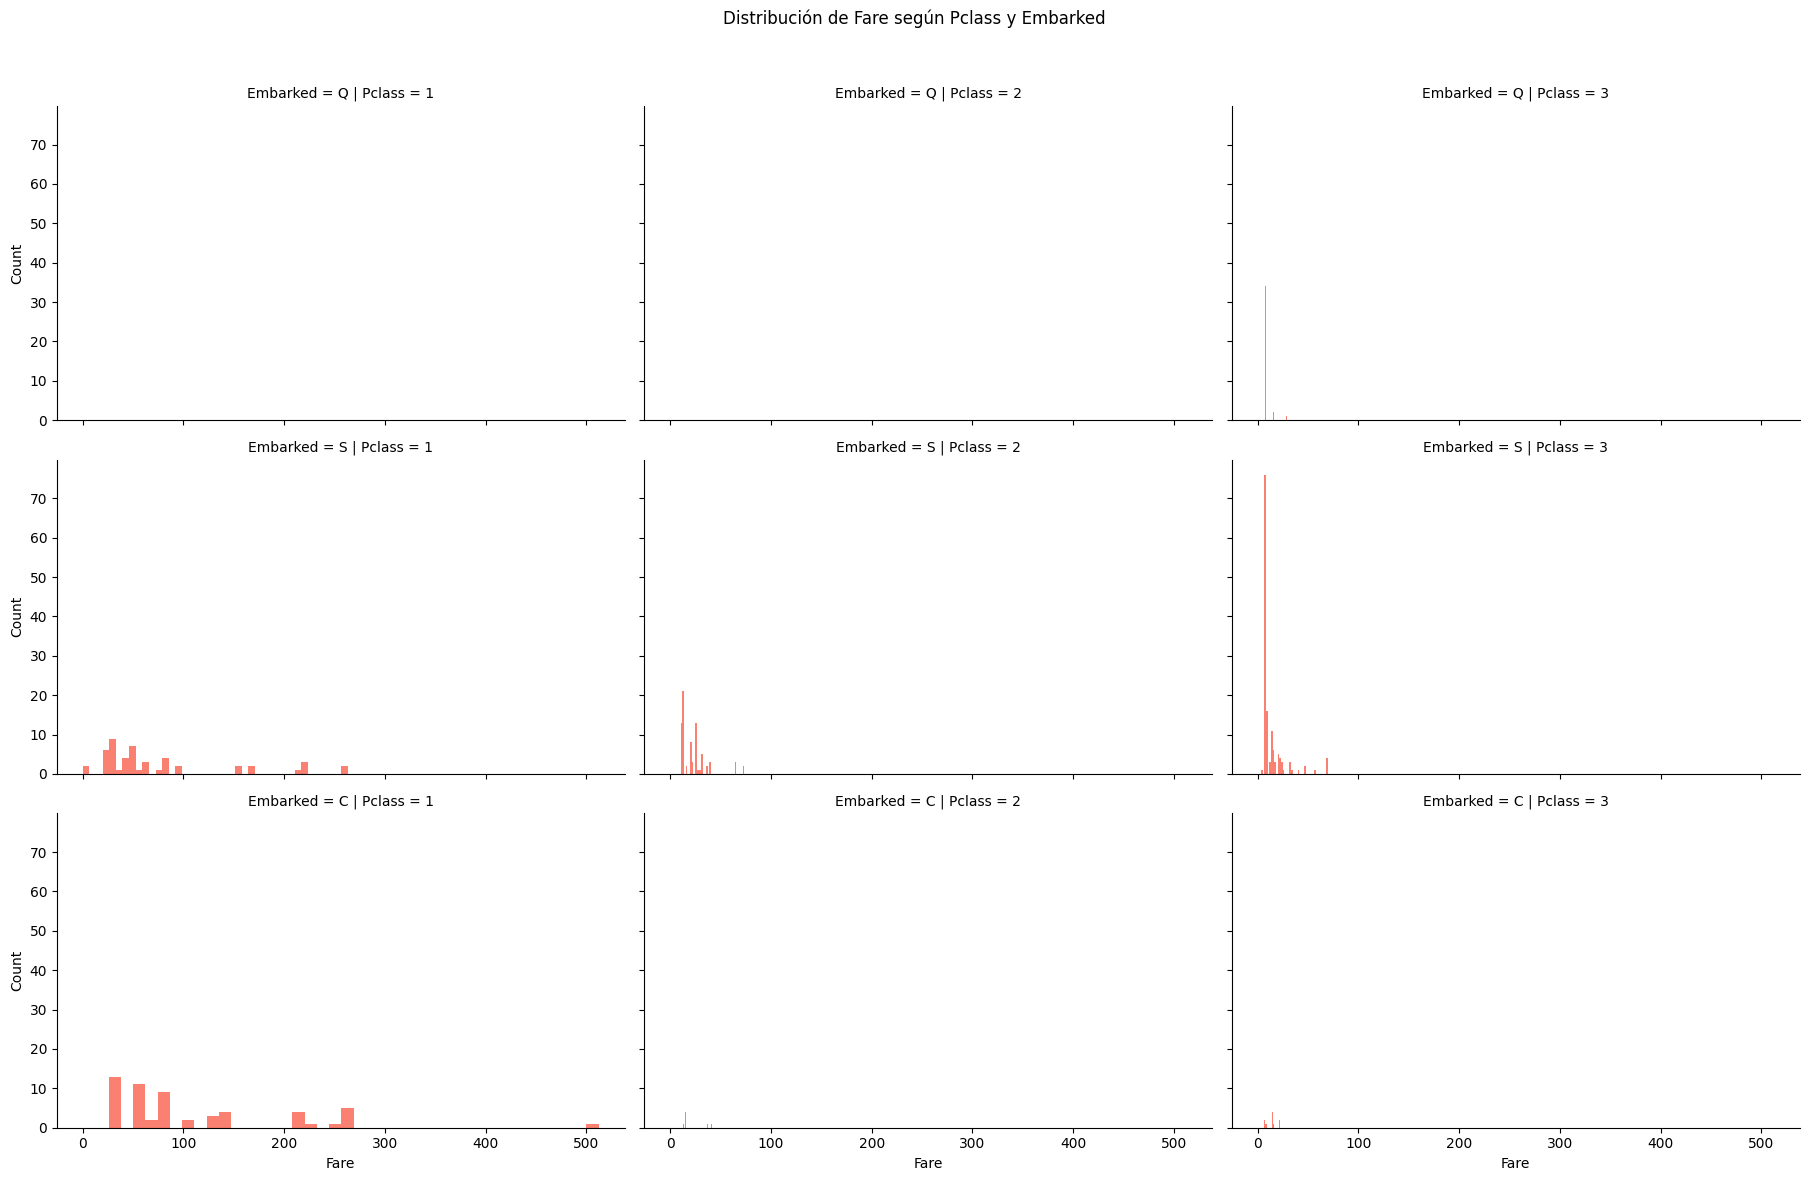

In [17]:
g = sns.FacetGrid(df_test, col='Pclass', row='Embarked', height=4, aspect=1.5)
g.map(plt.hist, 'Fare', bins=40, color='salmon')
g.set_axis_labels('Fare', 'Count')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de Fare según Pclass y Embarked')
plt.show()


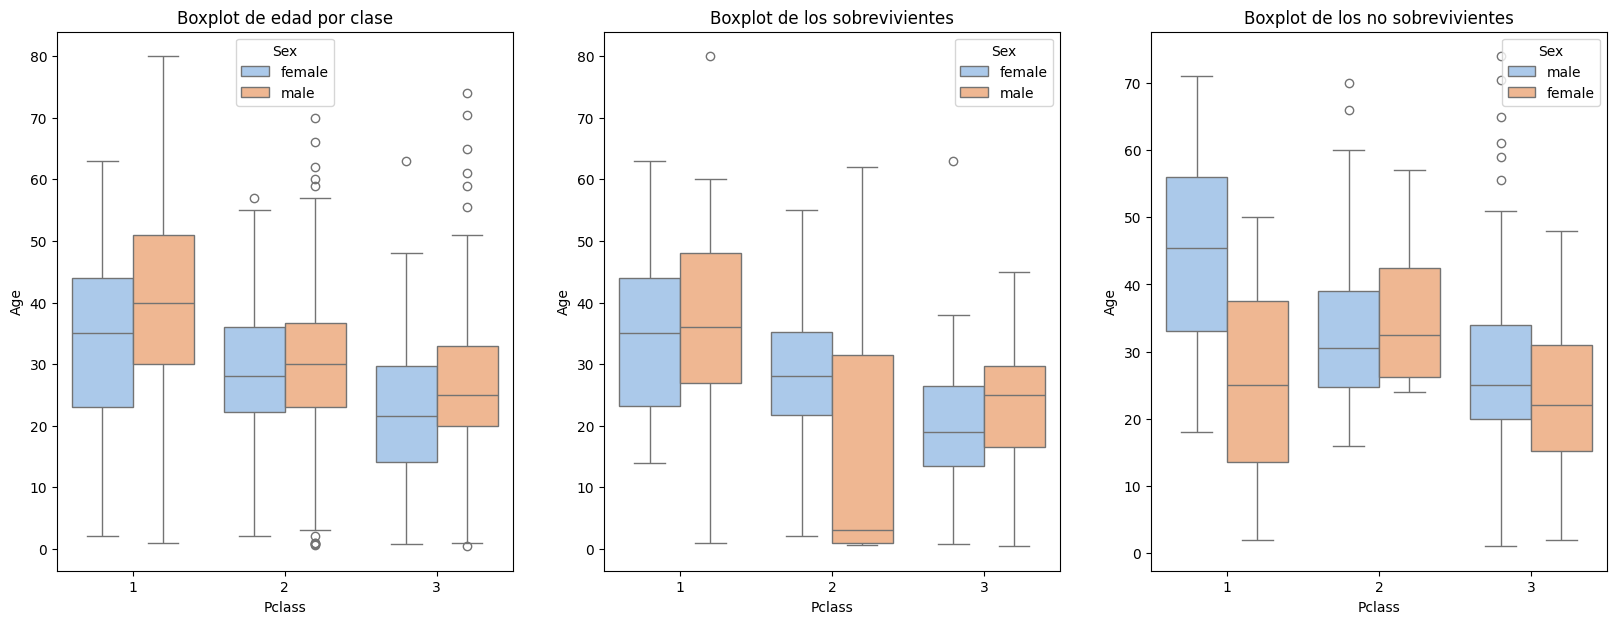

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,7))
sns.boxplot(x='Pclass', y='Age', data=df_train, palette='pastel', hue='Sex', ax=ax1)
ax1.set_title('Boxplot de edad por clase')
sns.boxplot(x='Pclass', y='Age', data=df_train[df_train['Survived']==1], palette='pastel', hue='Sex', ax=ax2)
ax2.set_title('Boxplot de los sobrevivientes')
sns.boxplot(x='Pclass', y='Age', data=df_train[df_train['Survived']==0], palette='pastel', hue='Sex', ax=ax3)
ax3.set_title('Boxplot de los no sobrevivientes')
plt.show()


Menos outliers en los sobrevivientes. Y además tienden a ser más grandes los sobrevivientes de la clase 1. 

## Limpieza 

In [18]:
# Agrupar por 'Pclass' y 'Survived' y calcular la media de 'Age'
media_edad = df_train.groupby(['Pclass', 'Survived'])['Age'].transform('mean').round()

# Mostrar los resultados
print(media_edad)

0      27.0
1      35.0
2      21.0
3      35.0
4      27.0
       ... 
886    34.0
887    35.0
888    27.0
889    35.0
890    27.0
Name: Age, Length: 891, dtype: float64


In [19]:
df_train['Age']=df_train['Age'].fillna(media_edad)
df_test['Age']=df_test['Age'].fillna(df_test.groupby(['Pclass'])['Age'].transform('mean').round())
df_test['Fare']=df_test['Fare'].fillna(df_test.groupby(['Pclass'])['Fare'].transform('mean').round())

In [20]:
df_train.drop(columns=['Ticket','Name','Cabin'],inplace=True)
df_test.drop(columns=['Ticket','Name','Cabin'],inplace=True)

In [21]:
df_train.dropna(inplace=True)

### Variables categóricas

In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [23]:
df_train=pd.get_dummies(df_train, columns=['Sex'], prefix='sex' ) 
df_test = pd.get_dummies(df_test, columns=['Sex'], prefix='sex')
df_train=pd.get_dummies(df_train, columns=['Embarked'], prefix='embarked' ) 
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='embarked')

# Vamos con el modelo de predicción

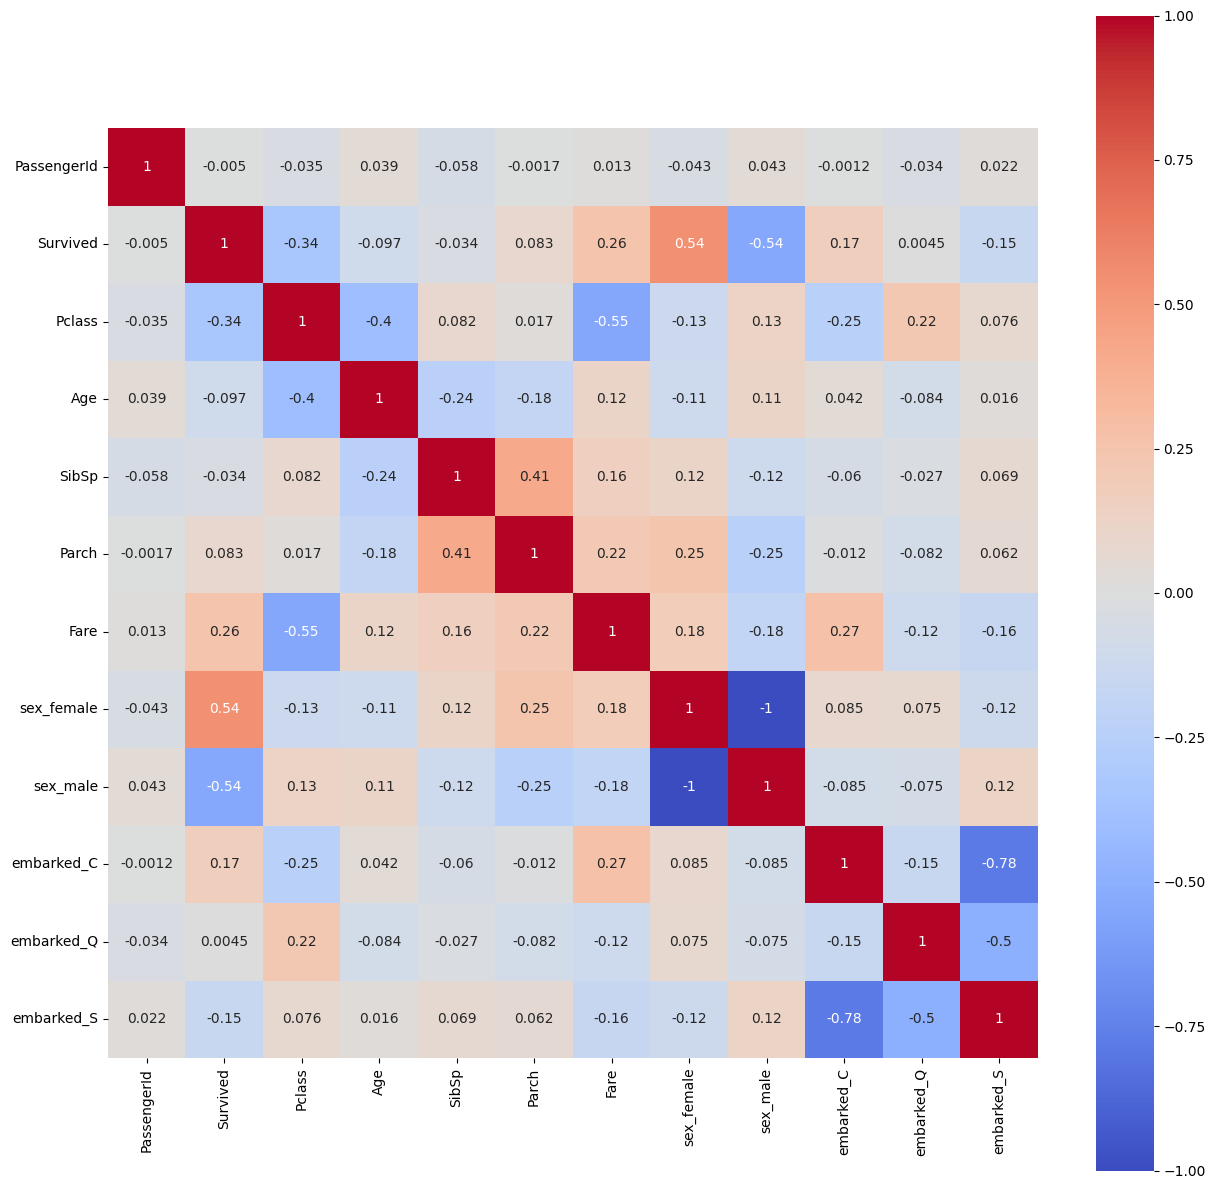

In [21]:
corr = df_train.corr()
graph = sns.heatmap(corr, vmax=1, vmin=-1, center=0, square=True, cmap='coolwarm', annot=True)
graph.figure.set_size_inches(15,15)

In [25]:
## Primero, veamos si mis clases son desbalanceadas (spoiler: sí)
df_train.Survived.value_counts(), df_train.Survived.value_counts(normalize=True)

(Survived
 0    549
 1    340
 Name: count, dtype: int64,
 Survived
 0    0.617548
 1    0.382452
 Name: proportion, dtype: float64)

In [26]:
from sklearn.model_selection import  train_test_split
X_train = df_train.drop(columns=['Survived'])  
y_train = df_train['Survived']  

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, shuffle=True)

### Para evaluar mis modelos

In [28]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

# Función para entrenar y evaluar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test):
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {
        'AUC-ROC': auc_score,
        'F1 Score': f1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }


## 1. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,  KFold


weight={1: 0.9, 0: 0.6}
# Parámetros para la búsqueda aleatoria
param_dist = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [50, 100, 500],
    'max_features': [0.5, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced', 'balanced_subsample', weight, None],
    'max_leaf_nodes': [None, 10, 20]
}

# Creo el modelo
rf = RandomForestClassifier(random_state=42, n_jobs=-1,)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_dist,  
    cv=5,       
    scoring='roc_auc',  
    verbose=2,
    n_jobs=-1 
)

# Entreno todo el conjunto de entrenamiento 
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated AUC score: {grid_search.best_score_}")

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 0.5, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Best cross-validated AUC score: 0.9076067298929141


In [29]:
best_rf = RandomForestClassifier(
    max_depth=grid_search.best_params_['max_depth'], 
    n_estimators=grid_search.best_params_['n_estimators'],
    max_features=grid_search.best_params_['max_features'], 
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    class_weight=grid_search.best_params_['class_weight'], 
    max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'], 
    random_state=42,
    n_jobs=-1
)

# Evaluar el modelo
rf_metrics = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print("Random Forest Metrics:", rf_metrics)



Random Forest Metrics: {'AUC-ROC': 0.8401796407185628, 'F1 Score': 0.7213114754098361, 'Accuracy': 0.8089887640449438, 'Precision': 0.7951807228915663, 'Recall': 0.66}


## 2. Regresión Logística 

In [40]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Evaluar el modelo
log_reg_metrics = evaluate_model(log_reg, X_train, X_test, y_train, y_test)
print("Logistic Regression Metrics:", log_reg_metrics)



Logistic Regression Metrics: {'AUC-ROC': 0.8583233532934132, 'F1 Score': 0.7699999999999999, 'Accuracy': 0.8277153558052435, 'Precision': 0.77, 'Recall': 0.77}


## 3. KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn_metrics = evaluate_model(knn, X_train, X_test, y_train, y_test)
print("KNN Metrics:", knn_metrics)


KNN Metrics: {'AUC-ROC': 0.6043113772455089, 'F1 Score': 0.4432432432432432, 'Accuracy': 0.6142322097378277, 'Precision': 0.4823529411764706, 'Recall': 0.41}


## 4. XGBoost

In [39]:
from xgboost import XGBClassifier

# Crear el modelo XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Evaluar el modelo
xgb_metrics = evaluate_model(xgb, X_train, X_test, y_train, y_test)
print("XGBoost Metrics:", xgb_metrics)


XGBoost Metrics: {'AUC-ROC': 0.849940119760479, 'F1 Score': 0.7446808510638298, 'Accuracy': 0.8202247191011236, 'Precision': 0.7954545454545454, 'Recall': 0.7}


## Comparo mis modelos

In [41]:
comparison_df = pd.DataFrame({
    'Logistic Regression': log_reg_metrics,
    'KNN': knn_metrics,
    'XGBoost': xgb_metrics,
    'Random Forest': rf_metrics
})

comparison_df = comparison_df.T

print(comparison_df)


                      AUC-ROC  F1 Score  Accuracy  Precision  Recall
Logistic Regression  0.858323  0.770000  0.827715   0.770000    0.77
KNN                  0.604311  0.443243  0.614232   0.482353    0.41
XGBoost              0.849940  0.744681  0.820225   0.795455    0.70
Random Forest        0.840180  0.721311  0.808989   0.795181    0.66


Entonces mi mejor modelo para este caso termina siendo el de regresión logística.